In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


In [42]:
from pymasker import LandsatMasker, LandsatConfidence
import gdal
import matplotlib.pyplot as plt
import sys
import numpy as np
from scipy import misc
from PIL import Image as im
from scipy.ndimage import interpolation as inter

In [43]:
masker = LandsatMasker("LC08_L1TP_210017_20170711_20170711_01_RT_BQA.TIF", collection=1)
conf = LandsatConfidence.high
mask = masker.get_cloud_mask(conf)

In [38]:
img = gdal.Open("LC08_L1TP_210017_20170711_20170711_01_RT_B4.TIF")
arr = img.ReadAsArray()

In [49]:
# resize
newdims = (128, 128)
smallarr = misc.imresize(arr, newdims)

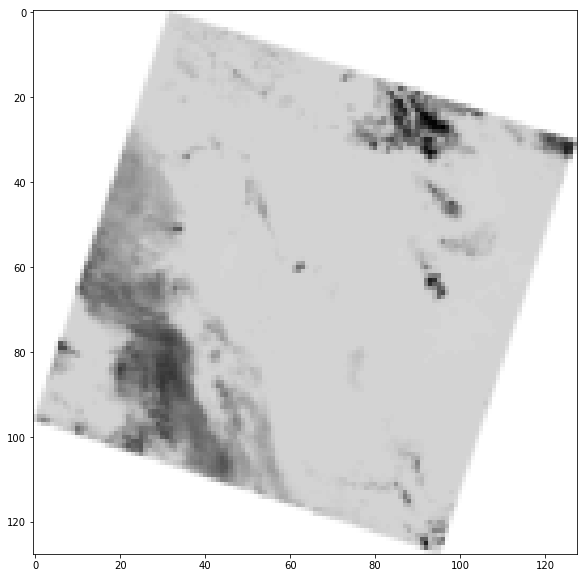

In [50]:
# convert to binary
wd, ht = smallarr.shape
bin_img = 1 - smallarr / 255.0
plt.imshow(bin_img, cmap='gray')
plt.show()

In [51]:
def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score

In [58]:
delta = .1
amin = 0
amax = 30
angles = np.arange(amin, amax, delta)
scores = []
for angle in angles:
    hist, score = find_score(smallarr, angle)
    scores.append(score)

In [59]:
best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {}'.format(best_angle))

Best angle: 17.9


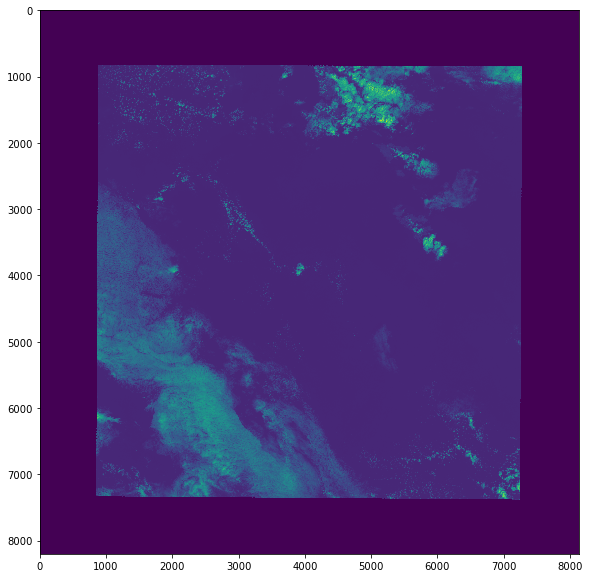

In [60]:
plt.imshow(inter.rotate(arr, best_angle, reshape=False, order=0))
plt.show()

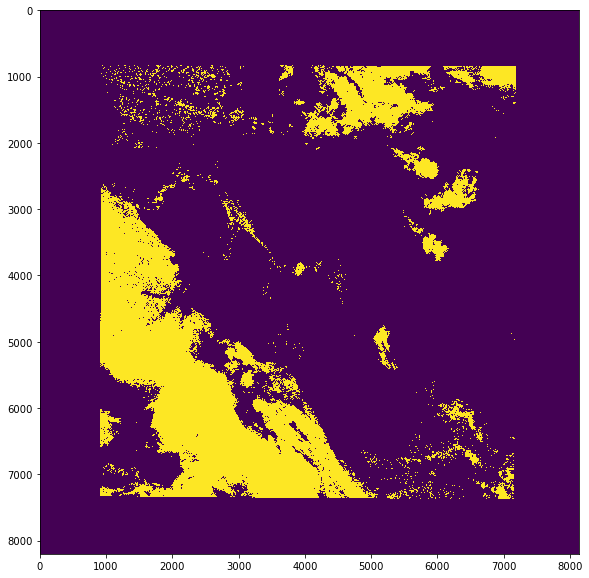

In [44]:
plt.imshow(inter.rotate(mask, best_angle, reshape=False, order=0))
plt.show()